# COVID-19 Vaccination Data Analysis



### First Class Started.This project is supposed to be completed in 2 classes. 


## Data Preparation and Cleaning




> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vaccinations_df = pd.read_csv('/content/drive/MyDrive/Dataset/country_vaccinations.csv')

In [ ]:
vaccinations_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31554,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31555,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31556,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31557,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


In [ ]:
vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31559 entries, 0 to 31558
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31559 non-null  object 
 1   iso_code                             31559 non-null  object 
 2   date                                 31559 non-null  object 
 3   total_vaccinations                   17668 non-null  float64
 4   people_vaccinated                    16825 non-null  float64
 5   people_fully_vaccinated              14056 non-null  float64
 6   daily_vaccinations_raw               14610 non-null  float64
 7   daily_vaccinations                   31315 non-null  float64
 8   total_vaccinations_per_hundred       17668 non-null  float64
 9   people_vaccinated_per_hundred        16825 non-null  float64
 10  people_fully_vaccinated_per_hundred  14056 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
vaccinations_df.columns #This is used to print all the columns. 

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [ ]:
vaccinations_df.shape

(31559, 15)

In [ ]:
vaccinations_df.describe() # It describes the distribution of data on different statistical parameter

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.766800e+04,1.682500e+04,1.405600e+04,1.461000e+04,3.131500e+04,17668.000000,16825.000000,14056.000000,31315.000000
mean,1.240539e+07,5.822263e+06,3.366567e+06,2.296473e+05,1.163343e+05,29.738031,19.384460,12.542610,3452.016957
std,6.878632e+07,2.147658e+07,1.254347e+07,1.260373e+06,8.483272e+05,35.368054,20.860233,16.033151,4571.311823
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.290522e+05,1.014510e+05,4.866350e+04,4.355500e+03,8.540000e+02,3.020000,2.600000,1.330000,417.000000
50%,9.130615e+05,6.517070e+05,3.706940e+05,2.148850e+04,6.555000e+03,14.855000,10.940000,5.680000,1879.000000
75%,4.328477e+06,2.876633e+06,1.686008e+06,9.585425e+04,3.613800e+04,45.262500,31.410000,18.012500,5189.000000
max,1.456557e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [ ]:
vaccinations_df.isnull().sum() # This finds number of null values in columns and finds the sum of it. 

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13891
people_vaccinated                      14734
people_fully_vaccinated                17503
daily_vaccinations_raw                 16949
daily_vaccinations                       244
total_vaccinations_per_hundred         13891
people_vaccinated_per_hundred          14734
people_fully_vaccinated_per_hundred    17503
daily_vaccinations_per_million           244
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
vaccinations_df.fillna(value=0, inplace=True) # This puts 0 in the case of all null values. Do remember null and 0 are different. Null means nothing whereas 0 is a mathematical quantity. 
vaccinations_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31554,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,0.0,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31555,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31556,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31557,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


In [ ]:
vaccinations_df['date'].min() # This tells us from which date we have data. 

'2020-12-02'

In [ ]:
vaccinations_df['date'].max() # This tells us to which date we have data. 

'2021-07-18'

In [ ]:
# We want our data to be separated on basis of '-' and date's day, month and year being saved in different columns. 
date = vaccinations_df.date.str.split('-', expand=True) 
date

,0,1,2
0,2021,02,22
1,2021,02,23
2,2021,02,24
3,2021,02,25
4,2021,02,26
...,...,...,...
31554,2021,07,11
31555,2021,07,12
31556,2021,07,13
31557,2021,07,14


In [ ]:
# We are adding new columns for year, month and day. 
vaccinations_df['year'] = date[0] 
vaccinations_df['month'] = date[1]
vaccinations_df['day'] = date[2]

# Changing all to numbers. 
vaccinations_df.year = pd.to_numeric(vaccinations_df.year) 
vaccinations_df.month = pd.to_numeric(vaccinations_df.month)
vaccinations_df.day = pd.to_numeric(vaccinations_df.day)
# putting new value into date. 
vaccinations_df.date = pd.to_datetime(vaccinations_df.date)

vaccinations_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26


In [ ]:
vaccinations_df.info() # year, month and day are mentioned at last. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31559 entries, 0 to 31558
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              31559 non-null  object        
 1   iso_code                             31559 non-null  object        
 2   date                                 31559 non-null  datetime64[ns]
 3   total_vaccinations                   31559 non-null  float64       
 4   people_vaccinated                    31559 non-null  float64       
 5   people_fully_vaccinated              31559 non-null  float64       
 6   daily_vaccinations_raw               31559 non-null  float64       
 7   daily_vaccinations                   31559 non-null  float64       
 8   total_vaccinations_per_hundred       31559 non-null  float64       
 9   people_vaccinated_per_hundred        31559 non-null  float64       
 10  people_ful

## Exploratory Analysis and Visualization




Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# sns.set_style('darkgrid') # optional 
# matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['figure.figsize'] = (9, 5)
# matplotlib.rcParams['figure.facecolor'] = '#00000000'

Explore the mean, min, max

In [ ]:
vaccinations_df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


total_vaccinations                     6.945036e+06
people_vaccinated                      3.104014e+06
people_fully_vaccinated                1.499429e+06
daily_vaccinations_raw                 1.063135e+05
daily_vaccinations                     1.154348e+05
total_vaccinations_per_hundred         1.664855e+01
people_vaccinated_per_hundred          1.033441e+01
people_fully_vaccinated_per_hundred    5.586328e+00
daily_vaccinations_per_million         3.425328e+03
year                                   2.020987e+03
month                                  4.431414e+00
day                                    1.544162e+01
dtype: float64

In [ ]:
vaccinations_df.min()

country                                                                      Afghanistan
iso_code                                                                             ABW
date                                                                 2020-12-02 00:00:00
total_vaccinations                                                                     0
people_vaccinated                                                                      0
people_fully_vaccinated                                                                0
daily_vaccinations_raw                                                                 0
daily_vaccinations                                                                     0
total_vaccinations_per_hundred                                                         0
people_vaccinated_per_hundred                                                          0
people_fully_vaccinated_per_hundred                                                    0
daily_vaccinations_pe

In [ ]:
vaccinations_df.max()

country                                                                         Zimbabwe
iso_code                                                                             ZWE
date                                                                 2021-07-18 00:00:00
total_vaccinations                                                           1.45656e+09
people_vaccinated                                                               6.22e+08
people_fully_vaccinated                                                      2.23299e+08
daily_vaccinations_raw                                                        2.4741e+07
daily_vaccinations                                                           2.24243e+07
total_vaccinations_per_hundred                                                    232.35
people_vaccinated_per_hundred                                                     116.66
people_fully_vaccinated_per_hundred                                               115.69
daily_vaccinations_pe

Explore the country Column


In [ ]:
vaccinations_df.country.value_counts()

Latvia                             227
Norway                             226
England                            222
Scotland                           222
Canada                             217
                                  ... 
Niue                                16
Pitcairn                             7
Bonaire Sint Eustatius and Saba      1
Haiti                                1
Turkmenistan                         1
Name: country, Length: 219, dtype: int64

In [ ]:
vaccinations_df.country

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
31554       Zimbabwe
31555       Zimbabwe
31556       Zimbabwe
31557       Zimbabwe
31558       Zimbabwe
Name: country, Length: 31559, dtype: object

In [ ]:
vaccinations_df.country.nunique() # From country column we checked how many values are there. 

219

Explore the min and max of fully vaccinated people. 

In [ ]:
vaccinations_df.people_fully_vaccinated.min()

0.0

In [ ]:
vaccinations_df.people_fully_vaccinated.max()

223299000.0

Explore the min and max date.

In [ ]:
vaccinations_df.date.min()

Timestamp('2020-12-02 00:00:00')

In [ ]:
vaccinations_df.date.max()

Timestamp('2021-07-18 00:00:00')

Explore The Number of daily vaccinations dynamic

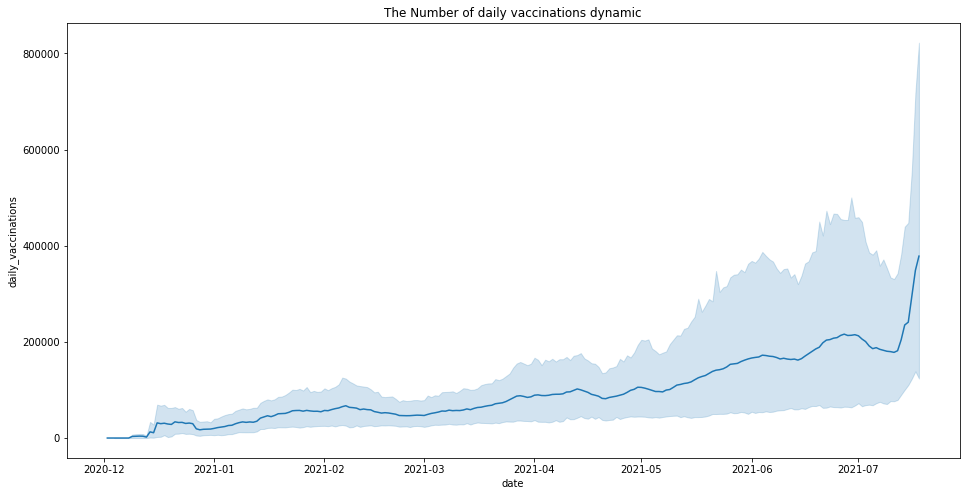

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=vaccinations_df.date, y=vaccinations_df.daily_vaccinations)
plt.title('The Number of daily vaccinations dynamic')
plt.show()

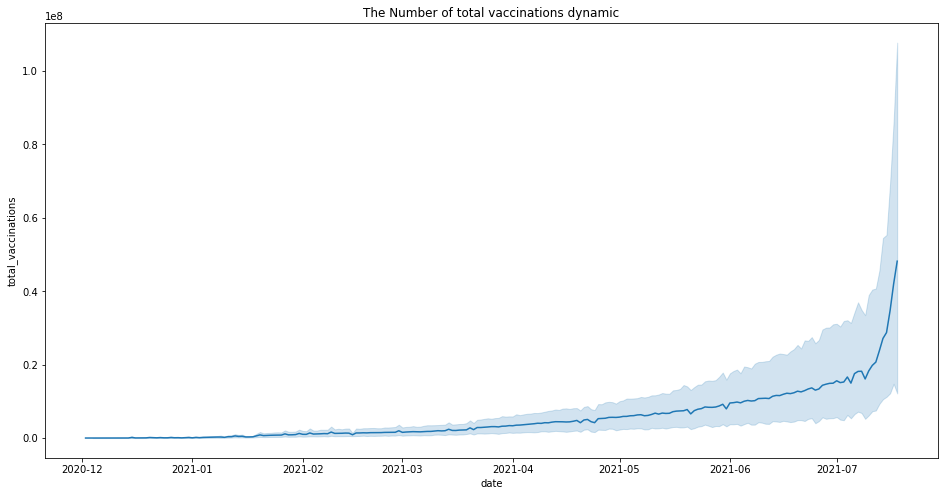

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=vaccinations_df.date, y=vaccinations_df.total_vaccinations)
plt.title('The Number of total vaccinations dynamic')
plt.show()

Explore the Vaccination procedure go on rapidly from which date.

In [ ]:
countries = vaccinations_df.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index # We groupped it on basis of country according to their total vaccinations.
# Then arranged them in descending order. 
print(countries)

top_countries = pd.DataFrame(columns= vaccinations_df.columns) # We made dataframe with name of top_countries and imported the name of columns of  vaccination dataframe. 

for country in countries: # Now with the help of this new loop we will add the country name in top_countries data_frame. 
  top_countries = top_countries.append(vaccinations_df.loc[vaccinations_df['country'] == country])

Index(['China', 'India', 'United States', 'Brazil', 'Germany'], dtype='object', name='country')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


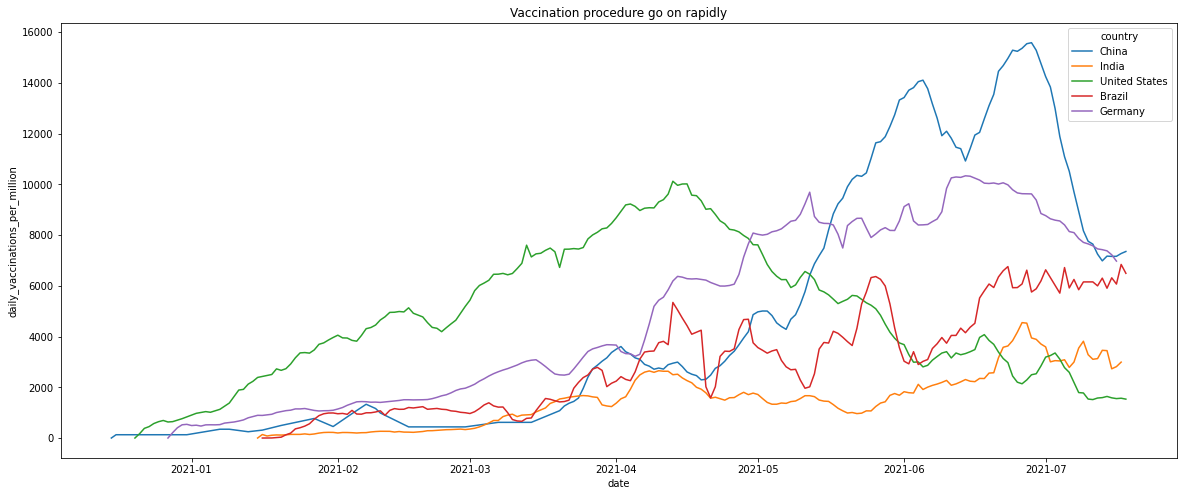

In [ ]:
plt.figure(figsize=(20,8))

sns.lineplot(top_countries['date'], 
             top_countries['daily_vaccinations_per_million'], 
             hue= top_countries['country'])

plt.title('Vaccination procedure go on rapidly');

#### Q1: Which country has most number of fully vaccinated people?

In [ ]:
fully_vaccinated = vaccinations_df.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending= False).head(25)

In [ ]:
fully_vaccinated.reset_index()

,country,people_fully_vaccinated
0,China,223299000.0
1,United States,161232483.0
2,India,83037953.0
3,Germany,38194316.0
4,United Kingdom,35970849.0
5,Brazil,33990366.0
6,England,30107863.0
7,Japan,27411127.0
8,France,27070389.0
9,Italy,26319734.0


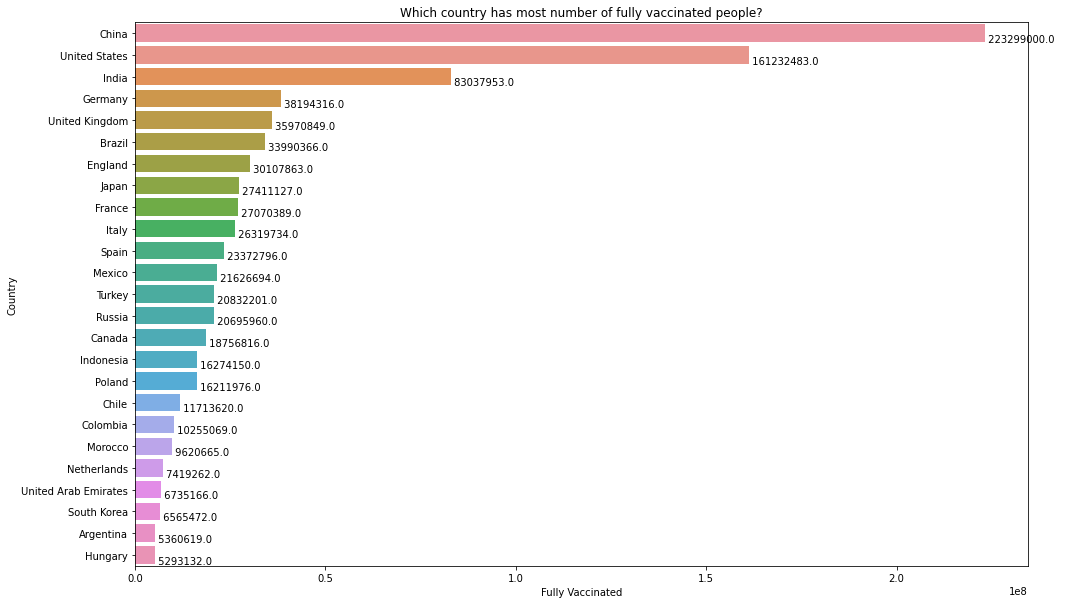

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=fully_vaccinated, y=fully_vaccinated.index)

plt.xlabel("Fully Vaccinated")
plt.ylabel("Country");
plt.title('Which country has most number of fully vaccinated people?');

# The concept of patches need to be taught. 
for patch in ax.patches:
    width = patch.get_width() # it get's the width of the bar
    height = patch.get_height() # it get's the height of the bar
    x = patch.get_x()# It get's the x coordinate from where the bar starts 
    y = patch.get_y()# It get's the y coordinate from where the bar starts
    
    plt.text(width + x, height + y, ' {:.1f} '.format(width)) # It finds the x and y coordinte where the text will be written.

#### Q2: Daily COVID-19 vaccine doses administered per million people ?

In [ ]:
daily_vaccinations_per_million = vaccinations_df.groupby("country")["daily_vaccinations_per_million"].max().sort_values(ascending= False).head(15)

In [ ]:
daily_vaccinations_per_million.reset_index()

,country,daily_vaccinations_per_million
0,Bhutan,118759.0
1,Falkland Islands,54264.0
2,Niue,53770.0
3,Cook Islands,46231.0
4,Mongolia,38271.0
5,Gibraltar,31700.0
6,Wallis and Futuna,30500.0
7,Saint Helena,27178.0
8,Aruba,25092.0
9,Seychelles,24415.0


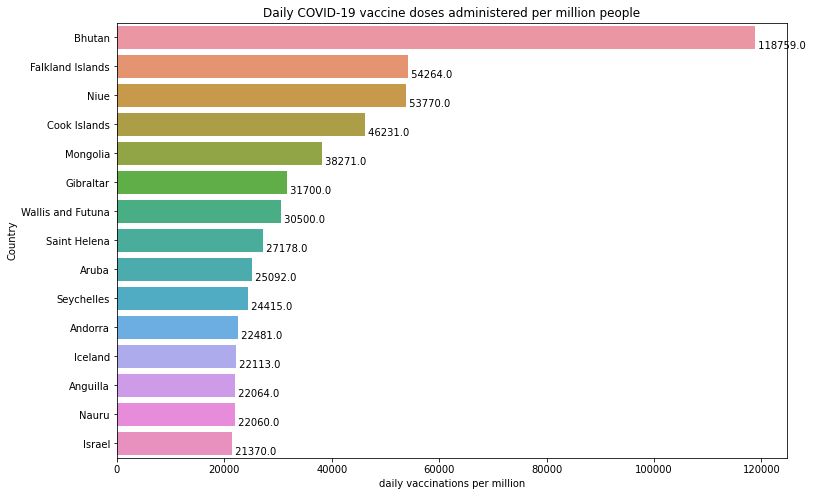

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=daily_vaccinations_per_million, y=daily_vaccinations_per_million.index )
plt.xlabel("daily vaccinations per million")
plt.ylabel("Country")
plt.title("Daily COVID-19 vaccine doses administered per million people");

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, ' {:.1f} '.format(width))

#### Q3: How many people daily vaccinated in England?

In [ ]:
england_df = vaccinations_df[vaccinations_df['country'] == 'England']
england_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
8481,England,OWID_ENG,2020-12-08,5302.0,5302.0,0.0,0.0,0.0,0.01,0.01,0.00,0.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2020,12,8
8482,England,OWID_ENG,2020-12-09,14890.0,14890.0,0.0,9588.0,9588.0,0.03,0.03,0.00,170.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2020,12,9
8483,England,OWID_ENG,2020-12-10,26714.0,26714.0,0.0,11824.0,10706.0,0.05,0.05,0.00,190.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2020,12,10
8484,England,OWID_ENG,2020-12-11,39211.0,39211.0,0.0,12497.0,11303.0,0.07,0.07,0.00,201.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2020,12,11
8485,England,OWID_ENG,2020-12-12,49788.0,49788.0,0.0,10577.0,11122.0,0.09,0.09,0.00,198.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2020,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,England,OWID_ENG,2021-07-13,68053161.0,38624143.0,29429018.0,174661.0,190302.0,120.90,68.62,52.28,3381.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2021,7,13
8699,England,OWID_ENG,2021-07-14,68254501.0,38674148.0,29580353.0,201340.0,190344.0,121.26,68.71,52.55,3382.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2021,7,14
8700,England,OWID_ENG,2021-07-15,68474146.0,38726641.0,29747505.0,219645.0,190542.0,121.65,68.80,52.85,3385.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2021,7,15
8701,England,OWID_ENG,2021-07-16,68688329.0,38776888.0,29911441.0,214183.0,189488.0,122.03,68.89,53.14,3366.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2021,7,16


In [ ]:
england_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 8481 to 8702
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              222 non-null    object        
 1   iso_code                             222 non-null    object        
 2   date                                 222 non-null    datetime64[ns]
 3   total_vaccinations                   222 non-null    float64       
 4   people_vaccinated                    222 non-null    float64       
 5   people_fully_vaccinated              222 non-null    float64       
 6   daily_vaccinations_raw               222 non-null    float64       
 7   daily_vaccinations                   222 non-null    float64       
 8   total_vaccinations_per_hundred       222 non-null    float64       
 9   people_vaccinated_per_hundred        222 non-null    float64       
 10  people_ful

In [ ]:
england_df.daily_vaccinations_raw.sum()

67906599.0

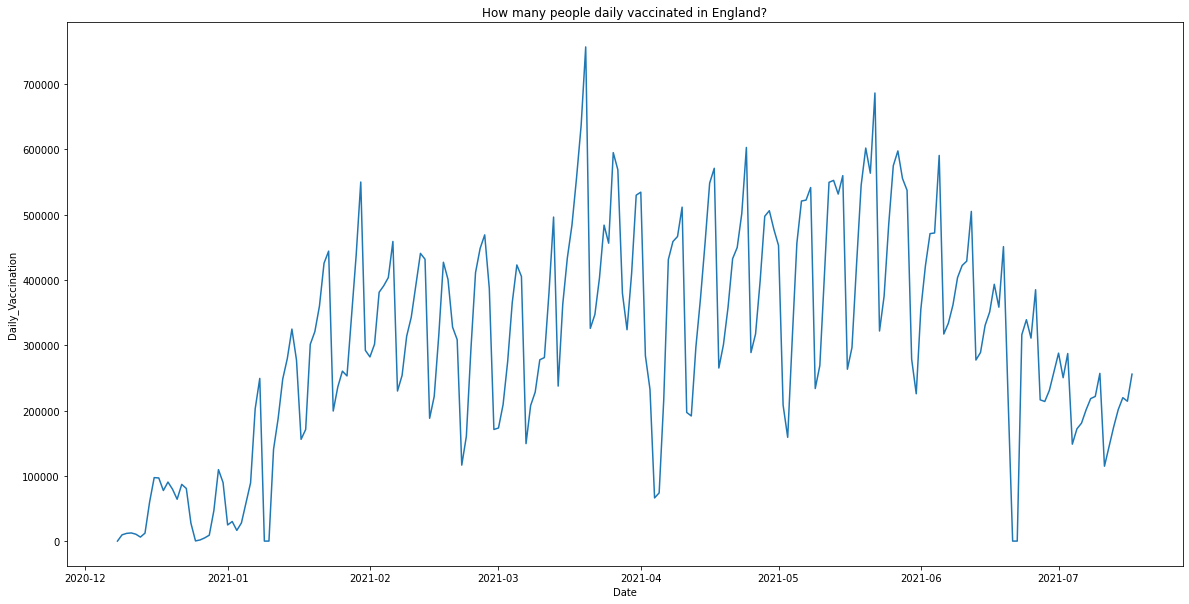

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x=england_df.date, y=england_df.daily_vaccinations_raw)
plt.xlabel("Date")
plt.ylabel("Daily_Vaccination")
plt.title('How many people daily vaccinated in England?');

#### Q4: How many people take at least one dose of vaccine in England?

In [ ]:
total_vaccinated_bd = england_df.total_vaccinations.max()/1000000

In [ ]:
print("{0:.2f} M people take at least one dose of vaccine in England.".format(total_vaccinated_bd))

68.94 M people take at least one dose of vaccine in England.


#### Q5: How many people total fully vaccinated in England?

In [ ]:
fully_vaccinated_bd = england_df.people_fully_vaccinated.max()/1000000

In [ ]:
print("Total fully vaccinated people in England: {0:.2f}M".format(fully_vaccinated_bd))

Total fully vaccinated people in England: 30.11M


#### Q6: What is the country that vaccinated completely most of the population?

In [ ]:
population_country=vaccinations_df.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False).head(15)

In [ ]:
population_country.reset_index()

,country,total_vaccinations_per_hundred
0,Gibraltar,232.35
1,United Arab Emirates,165.40
2,Malta,163.81
3,Cayman Islands,145.31
4,Seychelles,141.98
5,Isle of Man,139.35
6,Iceland,136.68
7,Wales,133.21
8,San Marino,132.74
9,Guernsey,132.65


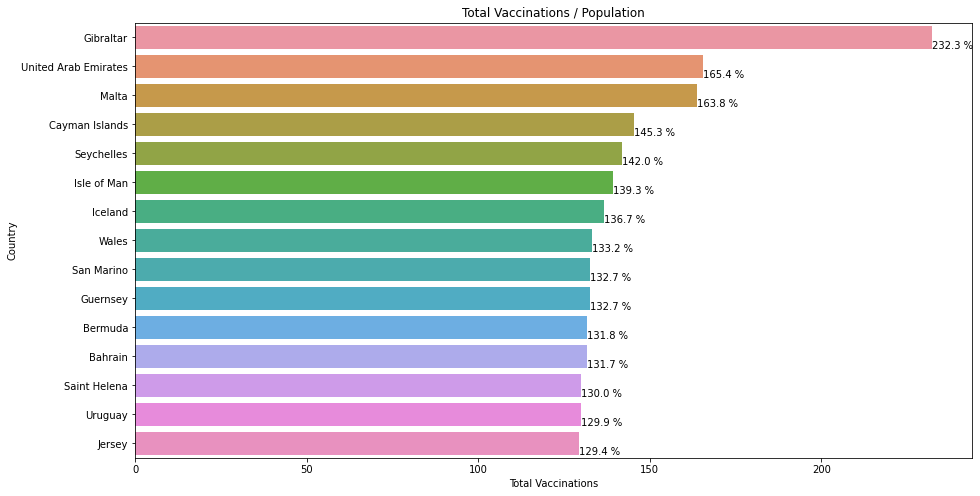

In [ ]:
plt.figure(figsize= (15, 8))
ax = sns.barplot(x=population_country, y=population_country.index)
plt.title('Total Vaccinations / Population')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))

#### Q7: Which are the top 25 countries which have vaccinted most number of its people ? 

In [ ]:
people_vaccinated = vaccinations_df.groupby("country")["people_vaccinated"].max().sort_values(ascending= False).head(25)

In [ ]:
people_vaccinated.reset_index()

,country,people_vaccinated
0,China,622000000.0
1,India,321893762.0
2,United States,186038501.0
3,Brazil,94082186.0
4,Germany,49632810.0
5,United Kingdom,46295853.0
6,Japan,42640078.0
7,Indonesia,41673464.0
8,Turkey,38965125.0
9,England,38836156.0


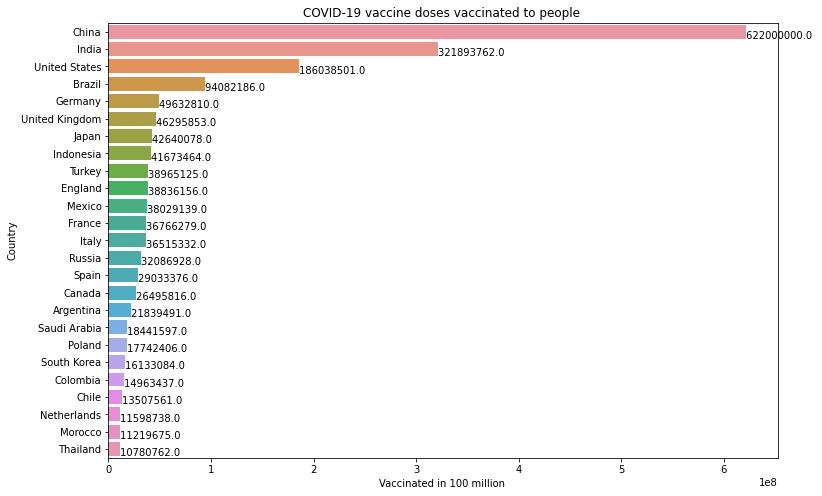

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=people_vaccinated, y=people_vaccinated.index )
plt.xlabel("Vaccinated in 100 million ")
plt.ylabel("Country")
plt.title("COVID-19 vaccine doses vaccinated to people ");

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} '.format(width))

#### Q.8 Find in which month there were maximum vaccination in any country ?

In [ ]:
india_df = vaccinations_df[vaccinations_df['country'] == 'India']
india_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
12874,India,IND,2021-01-15,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,1,15
12875,India,IND,2021-01-16,191181.0,191181.0,0.0,191181.0,191181.0,0.01,0.01,0.00,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,1,16
12876,India,IND,2021-01-17,224301.0,224301.0,0.0,33120.0,112150.0,0.02,0.02,0.00,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,1,17
12877,India,IND,2021-01-18,454049.0,454049.0,0.0,229748.0,151350.0,0.03,0.03,0.00,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,1,18
12878,India,IND,2021-01-19,674835.0,674835.0,0.0,220786.0,168709.0,0.05,0.05,0.00,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13053,India,IND,2021-07-13,387697935.0,311387539.0,76310396.0,6230289.0,4770041.0,28.09,22.56,5.53,3457.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,7,13
13054,India,IND,2021-07-14,391340491.0,313529502.0,77810989.0,3642556.0,4752818.0,28.36,22.72,5.64,3444.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,7,14
13055,India,IND,2021-07-15,395343767.0,316116189.0,79227578.0,4003276.0,3764649.0,28.65,22.91,5.74,2728.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,7,15
13056,India,IND,2021-07-16,399695879.0,318665226.0,81030653.0,4352112.0,3883425.0,28.96,23.09,5.87,2814.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,7,16


In [ ]:
months_india = india_df.groupby('month')['daily_vaccinations'].sum()
months_india=months_india.to_frame()
months_india=months_india.rename(columns={"daily_vaccinations":"Monthly_Vaccinations"})
months_india

,Monthly_Vaccinations
month,
1,3379485.0
2,10103631.0
3,47519159.0
4,84035890.0
5,58936437.0
6,113298089.0
7,74319564.0


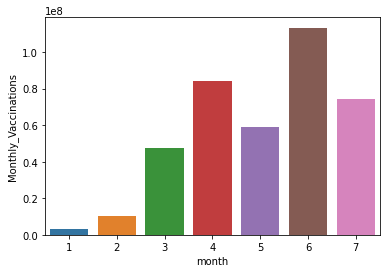

In [ ]:
sns.barplot(x =months_india.index, y =months_india.Monthly_Vaccinations)